#### @Author:  Marktus A Atanga
#### Johns Hopkins University
#### Algorithms for Data Scientists
#### Home Work 4

In [89]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sys
import itertools
from scipy import stats
from sklearn.preprocessing import LabelEncoder

from sklearn import cluster, datasets, mixture
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
plt.rcParams["axes.grid"] = False

#### Problem number 1

m=  [[2.5]
 [2.5]] 
 sigma =  [[1.73205081]
 [0.57735027]] K =  2
  Initial values:  

K =  2 

 x=  [[1 2]
 [4 2]
 [1 3]
 [4 3]] 

 mean =  [[2.17660879 3.75710516]
 [2.39220293 2.91903505]] 

 sigma =  [[1.15470054 1.15470054]] 

 prob =  [[0.5 0.5]] 


  expectation part of the algorithm
 
expfunc=  [0.04211525 0.71258309 0.05766707 0.97571723] 

 g=  [[0.06704469 0.03238609 0.0618376  0.0298708 ]
 [0.00502714 0.08505834 0.0068835  0.11646766]] 

 prob=  [[0.5 0.5]] 

 probKg=  [[0.03352234 0.01619305 0.0309188  0.0149354 ]
 [0.00251357 0.04252917 0.00344175 0.05823383]] 

 prob_ikn=   [[0.93024822 0.27575674 0.89983427 0.20412131]
 [0.06975178 0.72424326 0.10016573 0.79587869]] 


  maximization part of the algorithm

mean =  [[1.62322889 3.69837833]
 [2.47791101 2.53019142]] 

 sigma =  [[0.93026461 0.72903287]] 

 prob =  [[0.57749013 0.42250987]] 

 prob_ikn =  [[0.93024822 0.27575674 0.89983427 0.20412131]
 [0.06975178 0.72424326 0.10016573 0.79587869]]
meanPrevious =  [[1.6232

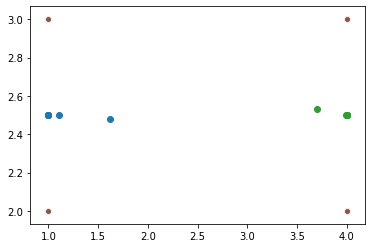

In [121]:
#https://github.com/mcdickenson/em-gaussian/blob/master/em-gaussian.py
#https://docs.scipy.org/doc/numpy-1.13.0/user/numpy-for-matlab-users.html
def simpleExpectationMaximization(x, K, prob, mean, sigma, threshold):
    import math
    N = x.shape[0]
    D = x.shape[1]

    initializeD = np.ones((D, 1))
    initializeN = np.ones((N, K))
    numberOfIterations = 0

    meanPrevious = mean
    sigmaPrevious = sigma
    probabilityPrevious = prob
    
    while (numberOfIterations<=5):    
        g = np.zeros((K,N)) #initialized gaussian function for each class and size(rows) in data (N)
        probKg = np.zeros((K,N))
            
        #Expectation step ***********************************************************************
        print('\033[1m \033[91m \033[4m' + "expectation part of the algorithm\n", '\033[0m')
            
        for k in range(K):    
            expfunc = np.exp(-sum(np.transpose(((x-(mean[:,k]*np.ones((N, D))))**2)))/(2*(sigma[:,k]**2)))
            g[k:] = expfunc/((np.sqrt(2*np.pi)*sigma[:,k])**D)                
            probKg[k:] = prob[:,k]*g[k:]         
        prob_ikn =  probKg/(np.ones((K, 1))*sum(probKg))
            
        print("expfunc= ", expfunc, "\n\n", "g= ", g, "\n\n", "prob= ",prob, "\n\n", "probKg= ", probKg,
                  "\n\n", "prob_ikn=  ", prob_ikn, "\n\n")
            
        # Maximization step ******************************************************************
        print('\033[1m \033[91m \033[4m' + "maximization part of the algorithm\n" + '\033[0m')            
        sum_prob_ikn = np.zeros((1, K))
        sum_prob_ikn = prob_ikn.sum(axis=1)
            
        for k in range(K):        
            mean[:,k] = sum(np.dot((prob_ikn[k,:].reshape(1, N)),x))/sum_prob_ikn[k] #update mean of each K  
            diff = (x -(mean[:,k]**np.ones((N, D))))**2                        
            sigma_numerator = np.sum((np.dot((prob_ikn[k,:].reshape(1, N)), diff)).sum(axis=0))        
            sigma[:,k] = np.sqrt(sigma_numerator/(D*sum_prob_ikn[k])) #update the std for eac K
            prob[:,k] = sum_prob_ikn[k]/N #update probability for each K
                
        #prob =  sum_prob_ikn /N # sum( sum_prob_ikn) #update the probabilities for eac K    
        print("mean = ", mean,"\n\n", "sigma = ", sigma, "\n\n", "prob = ", prob, "\n\n",
              "prob_ikn = ", prob_ikn)
        
        #Plot the data*********************************************************
        colors = ['tab:blue', 'tab:green','brown', 'grey'] 
        sns.scatterplot(x[:,0], x[:,1])
        for k in range(K):
            #plt.scatter(x[0][k], x[1][k], color = colors[k])
            plt.scatter(mean[0][k], mean[1][k], color=colors[k])
        
        #Determine if the values have converged***********************************
        print("meanPrevious = ", meanPrevious)
        meanDelta = max(np.sqrt(sum((mean - meanPrevious)**2)))
        sMean = np.mean(np.sqrt(sum(mean**2)))
        convMean = (meanDelta <= (sMean * threshold))
        
        sigmaDelta = max(np.sqrt(sum((sigma - sigmaPrevious)**2)))
        sSignma = np.mean(np.sqrt(sum(sigma**2)))
        convSigma = (sigmaDelta <= (sSignma * threshold))
        
        pDelta = max(np.sqrt(sum((prob - probabilityPrevious)**2)))
        sProbability = np.mean(np.sqrt(sum(prob**2)))
        convProbability = (pDelta <= (sProbability * threshold))

        numberOfIterations = numberOfIterations + 1
        if (convMean & convSigma & convProbability).any():
            converge = 1
        else:
            converge = 0
        print("converge = ", converge)       
#********************************************************************************
# Run EM algorithm 
#********************************************************************************
K = 2
x = np.array([[1,2],[4,2],[1,3],[4,3]])
m = np.mean(x, axis=0).reshape(-1,1) #tranpose 1d array mean in numpy
sigma = np.std(x, axis=0, ddof=1).reshape(-1,1)
initializeK = np.ones((1,K)) # initialize class
print("m= ", m, "\n", "sigma = ", sigma, "K = ", K)
rnd = np.array([-0.18671, 0.72579]) # Used for example
mean = m*initializeK + sigma*rnd
sigma = sigma.mean() * initializeK
prob = initializeK/K

print('\033[1m \033[91m \033[4m' + "Initial values: ", "\n" + '\033[0m') 

print("K = ", K,"\n\n","x= ",x, "\n\n", "mean = ", mean,"\n\n", "sigma = ", sigma, 
      "\n\n", "prob = ", prob, "\n\n")

simpleExpectationMaximization(x, K, prob, mean, sigma, sigma[0] * 1.0e-6)

#### Problem 2: Estimating the unkown parameters (mean(k), sigma(k), prob(k)) of Iris data set

In [188]:
def EM_Algorithm_IrisData(x, K, prob, mean, sigma, threshold):
    N = x.shape[0]
    D = x.shape[1]

    initializeD = np.ones((D, 1))
    initializeN = np.ones((N, K))
    max_iters = 5
    numberOfIterations = 0
    meanPrevious = mean
    sigmaPrevious = sigma
    probabilityPrevious = prob

    #cur_x = 3 # The algorithm starts at x=3
    #rate = 0.01 # Learning rate
    #precision = 0.000001 #This tells us when to stop the algorithm
    #previous_step_size = 1 #
    #max_iters = 10000 # maximum number of iterations
    #iters = 0 #iteration counter
    #df = lambda x: 2*(x+5) #Gradient of our function

    #while previous_step_size > precision and iters < max_iters:
    #prev_x = cur_x #Store current x value in prev_x
    #cur_x = cur_x - rate * df(prev_x) #Grad descent
    #previous_step_size = abs(cur_x - prev_x) #Change in x
    #iters = iters+1 #iteration count
    
    
    while (numberOfIterations < max_iters): 
        
        meanPrevious = mean
        sigmaPrevious = sigma
        probabilityPrevious = prob
        print("here")
        g = np.zeros((K,N)) #initialized gaussian function for each class and size(rows) in data (N)
        probKg = np.zeros((K,N))
            
        #Expectation step ***********************************************************************
        print('\033[1m \033[91m \033[4m' + "expectation part of the algorithm\n", '\033[0m')
            
        for k in range(K):    
            expfunc = np.exp(-sum(np.transpose(((x-(mean[:,k]*np.ones((N, D))))**2)))/(2*(sigma[:,k]**2)))
            g[k:] = expfunc/((np.sqrt(2*np.pi)*sigma[:,k])**D)                
            probKg[k:] = prob[:,k]*g[k:]         
        prob_ikn =  probKg/(np.ones((K, 1))*sum(probKg))
            
        #print("prob= ",prob, "\n\n", "probKg= ", probKg,"\n\n", "prob_ikn=  ", prob_ikn, "\n\n")
            
        # Maximization step ******************************************************************
        print('\033[1m \033[91m \033[4m' + "maximization part of the algorithm\n" + '\033[0m')            
        sum_prob_ikn = np.zeros((1, K))
        sum_prob_ikn = prob_ikn.sum(axis=1)
            
        for k in range(K):        
            mean[:,k] = sum(np.dot((prob_ikn[k,:].reshape(1, N)),x))/sum_prob_ikn[k] #update mean of each K  
            diff = (x -(mean[:,k]**np.ones((N, D))))**2                        
            sigma_numerator = np.sum((np.dot((prob_ikn[k,:].reshape(1, N)), diff)).sum(axis=0))        
            sigma[:,k] = np.sqrt(sigma_numerator/(D*sum_prob_ikn[k])) #update the std for eac K
            prob[:,k] = sum_prob_ikn[k]/N #update probability for each K (posterior)
                
        #prob =  sum_prob_ikn /N # sum( sum_prob_ikn) #update the probabilities for eac K    
        print("mean = ", mean,"\n\n", "sigma = ", sigma, "\n\n", "prob = ", prob)
        
        #Plot the data*********************************************************
        print("whatsup!!!")
        
        #Determine if the values have converged***********************************
        print("meanPrevious = ", meanPrevious)
        meanDelta = max(np.sqrt(sum((mean - meanPrevious)**2)))
        sMean = np.mean(np.sqrt(sum(mean**2)))
        convMean = (meanDelta <= (sMean * threshold))
        
        sigmaDelta = max(np.sqrt(sum((sigma - sigmaPrevious)**2)))
        sSignma = np.mean(np.sqrt(sum(sigma**2)))
        convSigma = (sigmaDelta <= (sSignma * threshold))
        
        pDelta = max(np.sqrt(sum((prob - probabilityPrevious)**2)))
        sProbability = np.mean(np.sqrt(sum(prob**2)))
        convProbability = (pDelta <= (sProbability * threshold))

        if (convMean & convSigma & convProbability).any():
            converge = 1
        else:
            converge = 0
        print("converge = ", converge)       
        numberOfIterations = numberOfIterations + 1

In [189]:
IrisData = pd.read_csv("C:/Users/maa5m/Desktop/2018_school/ENG685.621.81.FA19_Algorithms_for_Data_Science/HW3/input/Irisdata.csv")

In [190]:
#********************************************************************************
# Run EM algorithm 
#********************************************************************************
K = 3 #number of classes
num_features = 4

data = IrisData[['sepallength']]#,'sepalwidth','petallength','petalwidth']].values
#data = IrisData[['petallength','petalwidth']].values ##remove headers
class_id = IrisData['class'].values
encoder = LabelEncoder()
label_encoder = encoder.fit(class_id)
class_id = label_encoder.transform(class_id) + 1
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

#calculate the mean of each feature per class
mean_vectors = []
for claz in range(1,4):
    mean_vectors.append(np.mean(data[class_id==claz], axis=0))
means = np.array(mean_vectors)
print("means= ",means)

#calculate the sigma for each feature per class
sigma_vectors = []
for claz in range(1,4):
    sigma_vectors.append(np.std(data[class_id==claz], axis=0, ddof=1))
sigmas = np.array(sigma_vectors)
print("sigmas=", sigmas)

#create covariance matrix for each class
#covmatrix = []
#for i in range(K):
#    covmatrix.append(make_spd_matrix(data.shape[1]))
#covmatrix = np.array(covmatrix)
#print("covmatrix = ",covmatrix)

initializeK = np.ones((1,K)) # initialize 1x2 matrix 
print(initializeK)

rnd = np.random.rand(1,K) # Used for example
mean = means*initializeK + sigmas*rnd
sigma = sigmas.mean() * initializeK
prob = initializeK/K

data = np.array(data) #algorithm expects an array

print('\033[1m \033[91m \033[4m' + "Initial values: ", "\n" + '\033[0m') 

print("K = ", K,"\n\n","x= ",x, "\n\n", "mean = ", mean,"\n\n", "sigma = ", sigma, "\n\n", "prob = ", prob, "\n")


EM_Algorithm_IrisData(data, K, prob, mean, sigma, sigma[0] * 1.0e-6)

means=  [[5.006]
 [5.936]
 [6.588]]
sigmas= [[0.35248969]
 [0.51617115]
 [0.63587959]]
[[1. 1. 1.]]
  Initial values:  

K =  3 

 x=  [[1 2]
 [4 2]
 [1 3]
 [4 3]] 

 mean =  [[5.23954385 5.1306572  5.0101351 ]
 [6.27799184 6.11854279 5.94205527]
 [7.00930529 6.81287742 6.59545958]] 

 sigma =  [[0.50151348 0.50151348 0.50151348]] 

 prob =  [[0.33333333 0.33333333 0.33333333]] 

here
  expectation part of the algorithm
 
  maximization part of the algorithm

mean =  [[6.6985259  6.04134645 5.31716402]
 [6.6985259  6.04134645 5.31716402]
 [6.6985259  6.04134645 5.31716402]] 

 sigma =  [[1.04376512 1.04030766 0.96406467]] 

 prob =  [[0.26634432 0.21852425 0.51513143]]
whatsup!!!
meanPrevious =  [[6.6985259  6.04134645 5.31716402]
 [6.6985259  6.04134645 5.31716402]
 [6.6985259  6.04134645 5.31716402]]
converge =  1
here
  expectation part of the algorithm
 
  maximization part of the algorithm

mean =  [[6.69737536 6.05586986 5.30467235]
 [6.69737536 6.05586986 5.30467235]
 [6.6973753

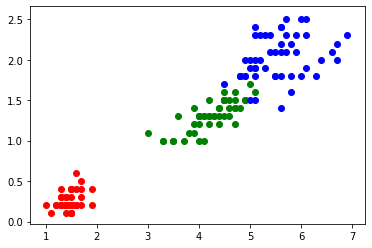

In [15]:
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
fig, ax = plt.subplots()
for i in range(IrisData.shape[0]):
    ax.scatter(IrisData['petallength'][i], IrisData['petalwidth'][i],color=colors[IrisData['class'][i]])
    